# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [29]:
### YOUR CODE HERE ###
import psycopg2
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()

# получаем имена таблиц из базы
# sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
# cursor.execute(sql_str)
# tables_data = [a for a in cursor.fetchall()]
# conn.commit()

# print("Какие таблицы содержатся в Postgres: %s" % tables_data)

# print('salary_grid')
salary_grid = pd.read_sql_query("select * from public.salary_grid;", conn)
# salary_grid.to_csv('salary_grid.csv')
# print(salary_grid.head())

# print('hr_dataset')
hr_dataset = pd.read_sql_query("select * from public.hr_dataset;", conn)
# hr_dataset.to_csv('hr_dataset.csv')
# print(hr_dataset.head())

# print('production_staff')
production_staff = pd.read_sql_query("select * from public.production_staff;", conn)
# production_staff.to_csv('production_staff.csv')
# print(production_staff.head())

# print('recruting_costs')
recruting_costs = pd.read_sql_query("select * from public.recruiting_costs;", conn)
# recruting_costs.to_csv('recruting_costs.csv')
# print(recruting_costs.head())
# hr_dataset`, `production_staff`, `recruting_costs


In [30]:
def MakePlot(data,subj_name,values_name,graph_name):
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    # 
    subj = data[subj_name].values
    values = data[values_name].values
    ax.set_title(graph_name)
    # 

    ax.bar(subj,values)
    plt.xticks(subj,rotation = 'vertical')
    plt.show()

In [31]:
# статистика

sql_str = """
    SELECT avg("Days Employed") as "Days Employed",avg(age)as age,avg("Pay Rate") as "Pay Rate"
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о средней продолжительности работы, возрасте и зарплате сотрудников:')
print(data)

sql_str = """
    SELECT sex,count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by sex;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о поле сотрудников:')
print(data)

sql_str = """
    SELECT maritaldesc,count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by maritaldesc;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о семейном положении сотрудников:')
print(data)

sql_str = """
    SELECT racedesc,count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by racedesc;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о расе сотрудников:')
print(data)

sql_str = """
    SELECT department,count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by department;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о подразделении сотрудников:')
print(data)

sql_str = """
    SELECT "Manager Name",count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by "Manager Name"
     order by count;
"""
data = pd.read_sql_query(sql_str, conn)
print('Данные о количестве сотрудников по менеджерам:')
print(data)


Данные о средней продолжительности работы, возрасте и зарплате сотрудников:
   Days Employed       age   Pay Rate
0    1559.917874  38.26087  33.414589
Данные о поле сотрудников:
      sex  count
0  Female    117
1    Male     90
Данные о семейном положении сотрудников:
  maritaldesc  count
0     Widowed      4
1     Married     77
2   Separated     11
3      Single    101
4    Divorced     14
Данные о расе сотрудников:
                           racedesc  count
0  American Indian or Alaska Native      4
1                 Two or more races     11
2                          Hispanic      3
3                             Asian     23
4                             White    126
5         Black or African American     40
Данные о подразделении сотрудников:
             department  count
0     Production           125
1         Admin Offices      7
2                 IT/IS     40
3      Executive Office      1
4  Software Engineering      7
5                 Sales     27
Данные о количестве со

      sex          avg
0  Female  1602.000000
1    Male  1505.211111


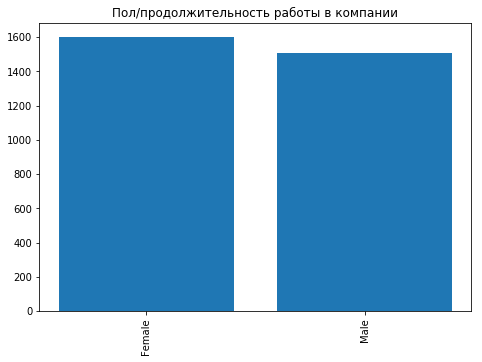

Видно, что продолжительность работы в компании не особо зависит от пола
      sex        avg
0  Female  31.594615
1    Male  35.780556


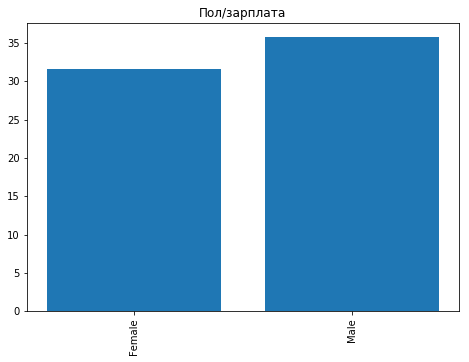

Видно, что зарплата в компании не особо зависит от пола
    count     sex            department
0       4  Female         Admin Offices
1       3    Male         Admin Offices
2       1  Female      Executive Office
3      21    Male                 IT/IS
4      19  Female                 IT/IS
5      76  Female     Production       
6      49    Male     Production       
7      15    Male                 Sales
8      12  Female                 Sales
9       2    Male  Software Engineering
10      5  Female  Software Engineering


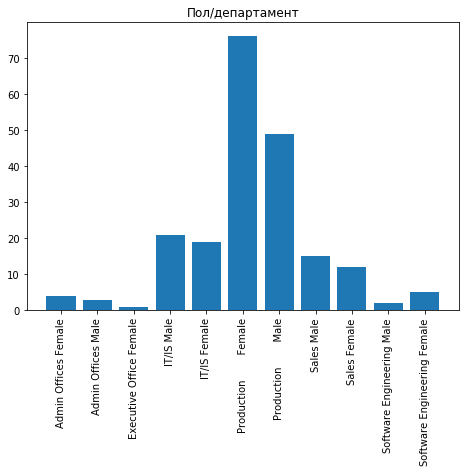

Видно, что в департаменте Production работает больше сотрудников женского пола, в остальных департаментах зависимость не видна (для Software Engineering слишком мало данных для выводов.
    count                         Employee Source  Total
0       1                           Pay Per Click   1323
1       1                           Careerbuilder   7790
2       9                                   Other   3995
3      11  Social Networks - Facebook Twitter etc   5573
4      12                    On-campus Recruiting   7500
5      13                      Website Banner Ads   7143
6      16                               Billboard   6192
7      17                                MBTA ads  10980
8      18                      Newspager/Magazine   8291
9      20                    Professional Society   1200
10     21                  Pay Per Click - Google   3509
11     24                             Monster.com   5760
12     25       Search Engine - Google Bing Yahoo   5183
13     29       

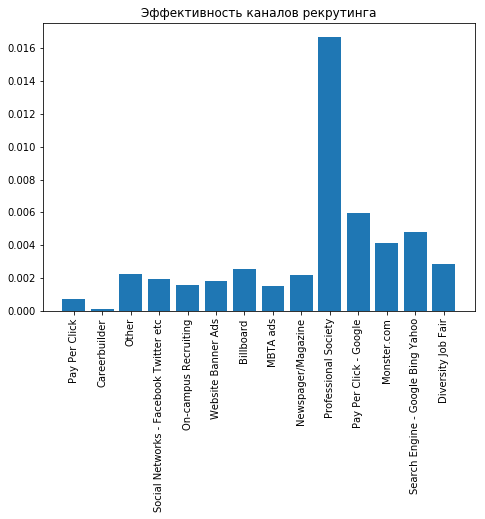

Видно, что некоторые каналы подбора персонала менее эффективны из расчета стоимости - от них можно отказаться.


In [32]:
# пол и зп/длительность работы/подразделение
sql_str = """
    SELECT hr_dataset.sex,avg("Days Employed")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by hr_dataset.sex;
"""
data = pd.read_sql_query(sql_str, conn)
print(data)

MakePlot(data,'sex','avg',"Пол/продолжительность работы в компании")
print('Видно, что продолжительность работы в компании не особо зависит от пола')

sql_str = """
    SELECT hr_dataset.sex,avg("Pay Rate")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by hr_dataset.sex;
"""
data = pd.read_sql_query(sql_str, conn)
print(data)

MakePlot(data,'sex','avg',"Пол/зарплата")
print('Видно, что зарплата в компании не особо зависит от пола')


sql_str = """
    SELECT count(hr_dataset.sex),hr_dataset.sex,department
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is NULL
     group by department,hr_dataset.sex
     order by department;
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
data['dep_sex']=data['department'].values + " " + data['sex'].values
MakePlot(data,'dep_sex','count',"Пол/департамент")
print('Видно, что в департаменте Production работает больше сотрудников женского пола, в остальных департаментах зависимость не видна (для Software Engineering слишком мало данных для выводов.')

# Есть ли смысл платить за каналы рекрутинга? recruting_costs
sql_str = """
    SELECT count(hr_dataset.sex),hr_dataset."Employee Source",recruiting_costs."Total" 
     FROM public.hr_dataset as hr_dataset
     inner Join public.recruiting_costs as recruiting_costs ON "Employee Source" = recruiting_costs."Employment Source"
     where recruiting_costs."Total">0
     group by "Employee Source","Total"
     order by count(hr_dataset.sex);
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
data['effectivity'] = data['count'].values/data['Total'].values
MakePlot(data,'Employee Source','effectivity',"Эффективность каналов рекрутинга")
print('Видно, что некоторые каналы подбора персонала менее эффективны из расчета стоимости - от них можно отказаться.')



    date_part  count
0         1.0      9
1         2.0      9
2         3.0      2
3         4.0     14
4         5.0     10
5         6.0     12
6         7.0      3
7         8.0      9
8         9.0     20
9        10.0      4
10       11.0      8
11       12.0      3


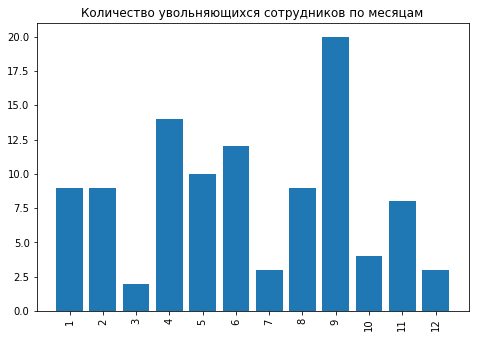

Видно, что в основном сотрудники увольняются в апреле и сентябре, можно подготовиться к более активному поиску


In [33]:
# когда увольняются сотрудники?
sql_str = """
    SELECT date_part('month', hr_dataset."Date of Termination"),count("Employee Name")
     FROM public.hr_dataset as hr_dataset
     where "Date of Termination" is not NULL
     group by date_part('month', hr_dataset."Date of Termination")
     order by date_part('month', hr_dataset."Date of Termination")
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
MakePlot(data,'date_part','count',"Количество увольняющихся сотрудников по месяцам")
print('Видно, что в основном сотрудники увольняются в апреле и сентябре, можно подготовиться к более активному поиску')


           avg   age
0  1210.145161  30.0
1  1391.481818  40.0
2  1330.622951  50.0
3  1248.666667  60.0
4  1043.000000  70.0


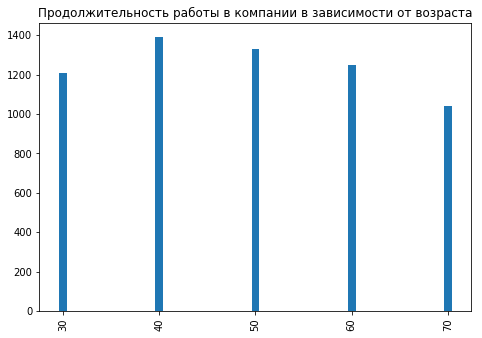

Видно, что продолжительность работы в компании не зависит от возраста
           avg  payrate
0  1657.000000     10.0
1  1286.449367     20.0
2  1309.940000     30.0
3   920.714286     40.0
4  1034.451613     50.0
5  1481.816327     60.0
6  2602.000000     70.0
7  1973.000000     80.0


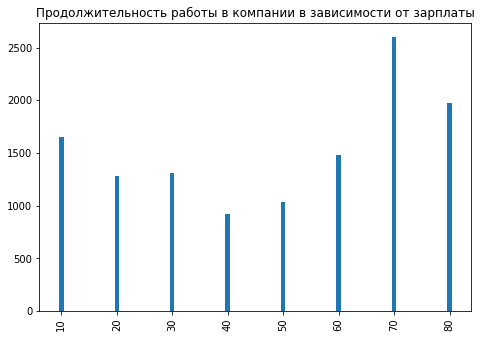

Видно, что продолжительность работы в компании снижается при средней зарплате. Возможно, стоит провести расследование такой статистики.
           avg  production
0  1271.725490       False
1  1308.024038        True


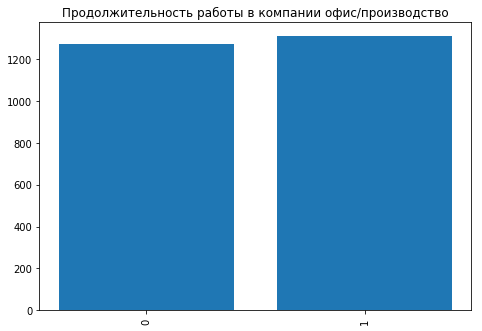

Видно, что продолжительность работы в компании не зависит от департамента.


In [34]:
# Есть зависимость между продолжительностью работы в компании и 
# возрастом сотрудника.
# зп
# офис/продакшн

sql_str = """
    SELECT avg("Days Employed"),round(hr_dataset.age,-1) as age
     FROM public.hr_dataset as hr_dataset
     group by round(hr_dataset.age,-1)
     order by round(hr_dataset.age,-1)
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
MakePlot(data,'age','avg',"Продолжительность работы в компании в зависимости от возраста")
print('Видно, что продолжительность работы в компании не зависит от возраста')

sql_str = """
    SELECT avg("Days Employed"),round(hr_dataset."Pay Rate"::numeric,-1) as payrate
     FROM public.hr_dataset as hr_dataset
     group by round(hr_dataset."Pay Rate"::numeric,-1)
     order by round(hr_dataset."Pay Rate"::numeric,-1)
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
MakePlot(data,'payrate','avg',"Продолжительность работы в компании в зависимости от зарплаты")
print('Видно, что продолжительность работы в компании снижается при средней зарплате. Возможно, стоит провести расследование такой статистики.')

sql_str = """
    SELECT avg("Days Employed"),(department ~ 'Production') as Production
     FROM public.hr_dataset as hr_dataset
     group by (department ~ 'Production')
"""
data = pd.read_sql_query(sql_str, conn)
print(data)
MakePlot(data,'production','avg',"Продолжительность работы в компании офис/производство")
print('Видно, что продолжительность работы в компании не зависит от департамента.')


          Manager Name    rating
0       Debra Houlihan  3.500000
1         Peter Monroe  3.625000
2   Brandon R. LeBlanc  3.750000
3       Michael Albert  3.777778
4           John Smith  3.818182
5        David Stanley  3.923077
6     Brian Champaigne  4.000000
7      Alex Sweetwater  4.000000
8   Board of Directors  4.000000
9        Kelley Spirea  4.000000
10       Ketsia Liebig  4.000000
11        Elijiah Gray  4.076923
12       Lynn Daneault  4.083333
13      Kissy Sullivan  4.100000
14      Webster Butler  4.166667
15          Simon Roup  4.166667
16        Eric Dougall  4.250000
17          Janet King  4.307692
18     Jennifer Zamora  4.333333
19      Brannon Miller  4.466667
20            Amy Dunn  4.571429


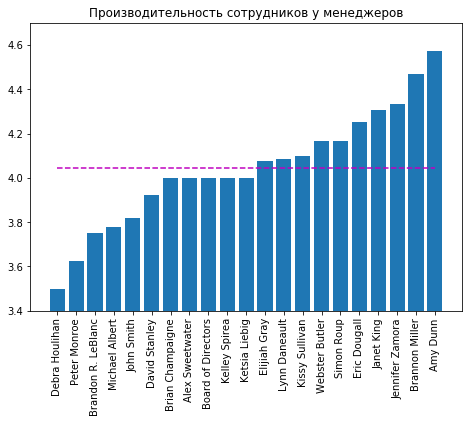

Видно, что сотрудники некоторых менеджеров более эффективны.


In [35]:
# Есть зависимость между perfomance score/ошибки и тем, под чьим руководством работает сотрудник.
sql_str = """
    SELECT "Manager Name",avg(CASE WHEN "Performance Score"~'Fully Meets'  THEN 4
      WHEN "Performance Score"~'90-day meets'  THEN 3
      WHEN "Performance Score"~'Exceptional'  THEN 6
      WHEN "Performance Score"~'Exceeds'  THEN 5
      WHEN "Performance Score"~'Needs Improvement' THEN 3
      WHEN "Performance Score"~'PIP'  THEN 4
      ELSE 4 end) as rating
     FROM public.hr_dataset as hr_dataset
     where not "Performance Score"~'N/A- too early to review'
     and "Date of Termination" is NULL

     group by "Manager Name"
     order by rating
"""
# Тут наверное стоило использовать колонку perf_scoreid, но я поздно её увидел

data = pd.read_sql_query(sql_str, conn)
print(data)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# 
subj = data['Manager Name'].values
values = data['rating'].values
ax.set_title("Производительность сотрудников у менеджеров")

ax.bar(subj,values)
plt.ylim(3.4,4.7)
plt.xticks(subj,rotation = 'vertical')
ax.hlines(data.mean(), subj[0], subj[len(subj)-1], colors='m', linestyles='dashed', label='dsdsd')
plt.show()
print('Видно, что сотрудники некоторых менеджеров более эффективны.')


## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [20]:
### YOUR CODE HERE ###


